75.37807161458333


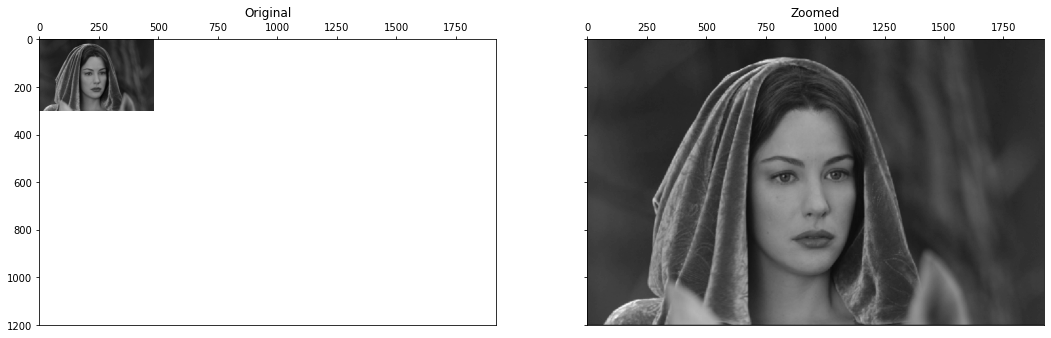

(1200, 1920)


In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 

img1 = cv.imread('../Images/im02.png',cv.IMREAD_GRAYSCALE)
img = cv.imread('../Images/im02small.png',cv.IMREAD_GRAYSCALE)

def zoom(interpolation_method, img, scale):
    if scale <= 0 or scale > 10:
        return print('Enter a scale between 0 and 10')
    rows = int(scale*img.shape[0])
    cols = int(scale*img.shape[1])
    #adding a row and a column similar to the last row and col of the image to prevent errors
    new_row = img[-1] 
    new_img = np.append(img, new_row)
    new_img = new_img.reshape((img.shape[0]+1,img.shape[1]))
    column =[]
    for x in new_img:
        last = (x[-1])
        x = np.append(x, last)
        column = np.append(column,x)
    column = column.reshape((img.shape[0]+1,img.shape[1]+1))
    zoomed = np.zeros((rows,cols), dtype =img.dtype)

    if interpolation_method == 'nearest_neighbor':
        for i in range(0, rows-1):
            for j in range(0, cols):
                zoomed[i,j] = column[round(i/scale) , round(j/scale)]
        zoomed = np.uint8(zoomed)
        return(zoomed)
    elif interpolation_method == 'bilinear':
        for i in range(0, rows):
            for j in range(0, cols):
                x_val = float(i/scale)
                y_val = float(j/scale)
                y_min = int(j/scale)
                y_max = y_min+1
                y = round(y_min*(y_max - y_val) + y_max*(y_val - y_min))
                x_min = int(i/scale)
                x_max = x_min+1
                x = round(x_min*(x_max - x_val) + x_max*(x_val - x_min))
                zoomed[i,j] = column[x,y]
        zoomed = np.uint8(zoomed)
        return(zoomed)

def ssd_per_pixel(img1, img2):
    if img1.shape != img2.shape:
        print("Image shapes are not similar")
    else:
        ssd = (np.sum((np.array(img1, dtype=np.int) - np.array(img2, dtype=np.int))**2))/(img1.shape[0]*img2.shape[1])
        return(ssd)
scale = 4 #Change the scale here
zoomed = zoom('nearest_neighbor', img, scale)
ssd = ssd_per_pixel(img1, zoomed)
print(ssd)
if scale < 1:
    limit_x = img.shape[1]
    limit_y = img.shape[0]
else:
    limit_x = zoomed.shape[1]
    limit_y = zoomed.shape[0]

fig,axes = plt.subplots(1,2, sharex = 'all', sharey = 'all',figsize=(18,18))
axes[0].imshow(img,cmap = 'gray')
axes[0].set_title('Original')
axes[0].set_xlim(0, limit_x)
axes[0].set_ylim(0, limit_y)
axes[0].xaxis.tick_top()
axes[1].imshow(zoomed,cmap = 'gray')
axes[1].set_title('Zoomed')
axes[1].set_xlim(0, limit_x)
axes[1].set_ylim(0, limit_y)
axes[1].xaxis.tick_top()
axes[1].invert_yaxis()
plt.show()
print(img.shape)
print(zoomed.shape)